# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Morales Condorpocco, Brian Facundo (346581);
2. Spinnicchia, Andrea (344912).

In [33]:
StudentID1 = 346581
StudentID2 = 344912

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [34]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Movies
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Hypochondria
Writing notes
Giving
Friends versus money
Loneliness
Parents' advice
Unpopularity
Keeping promises
Knowing the right people
Reliability
Thinking ahead
Energy levels
Final judgement
Achievements
Prioritising workload
Getting up
Number of friends
Charity
Interests or hobbies
Waiting
Funniness
Dreams
Children
Elections
Small - big dogs
Changing the past
Decision making
Cheating in school
Punctuality
Personality
Assertiveness
Borrowed stuff
Self-criticism
Workaholism
Responding to a serious letter
Mood swings
Empathy
Getting angry
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
Music
Slow songs or fast 

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [35]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [36]:
# PATH TO THE responses_hw.csv FILE
responses_path = "responses_hw.csv"

# LOADING THE DATASET AS DATAFRAME
responses_df = pd.read_csv(responses_path)

# DISPLAY THE DATAFRAME
display(responses_df)
print("INFO:")
print(responses_df.info())

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right,college/bachelor degree,no,city,block of flats


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None


In [38]:
# VALID FEATURES IN THE DATAFRAME OBTAINED FROM THE VARIABLES IN these_features 
valid_features = [feature for feature in these_features if feature in responses_df.columns.values]
if not valid_features:
    raise ValueError("No valid features found in the dataset for these_features.")

# NEW DATAFRAME WITH THE COLUMNS CORRESPONDING TO THE VARIABLES IN these_features
working_df = responses_df[valid_features]

# RANDOMLY SELECT 2/3 OF THE ROWS
X_df = working_df.sample(frac=2/3, random_state=0)

# DISPLAY THE OBTAINED DATAFRAME
display(X_df)
print('ciao')

,Hypochondria,Writing notes,Giving,Friends versus money,Loneliness,Parents' advice,Unpopularity,Keeping promises,Knowing the right people,Reliability,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
801,1.0,1.0,1.0,4.0,3.0,1.0,3.0,2.0,4.0,4.0,...,3.0,2.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
311,1.0,2.0,5.0,2.0,3.0,4.0,5.0,3.0,5.0,5.0,...,2.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0,2.0,5.0
85,3.0,2.0,4.0,4.0,3.0,2.0,5.0,5.0,3.0,4.0,...,4.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,3.0
435,1.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0,...,5.0,3.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0
204,3.0,5.0,1.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,...,4.0,4.0,2.0,5.0,4.0,5.0,4.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,5.0,2.0,...,2.0,1.0,5.0,3.0,1.0,1.0,1.0,3.0,5.0,1.0
930,3.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,...,2.0,3.0,5.0,3.0,1.0,1.0,1.0,3.0,3.0,2.0
106,1.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,...,1.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,3.0,4.0
16,1.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,2.0,...,1.0,3.0,2.0,3.0,2.0,3.0,1.0,1.0,4.0,1.0


In [39]:
# Analyze the DataFrame
print("Summary of X_df:")
print(X_df.describe(include='all'))

# Check for missing values
missing_values = X_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Summary of X_df:
        Hypochondria  Writing notes      Giving  Friends versus money  \
count     541.000000     541.000000  541.000000            541.000000   
unique           NaN            NaN         NaN                   NaN   
top              NaN            NaN         NaN                   NaN   
freq             NaN            NaN         NaN                   NaN   
mean        1.841035       3.036969    2.859519              3.774492   
std         1.119134       1.451220    1.324501              1.095858   
min         1.000000       1.000000    1.000000              1.000000   
25%         1.000000       2.000000    2.000000              3.000000   
50%         1.000000       3.000000    3.000000              4.000000   
75%         3.000000       4.000000    4.000000              5.000000   
max         5.000000       5.000000    5.000000              5.000000   

        Loneliness  Parents' advice  Unpopularity  Keeping promises  \
count   541.000000       541.000000

In [40]:
# Cleanse/encode operations
X_df = X_df.dropna()

# DISPLAY THE OBTAINED DATAFRAME
display(X_df)

,Hypochondria,Writing notes,Giving,Friends versus money,Loneliness,Parents' advice,Unpopularity,Keeping promises,Knowing the right people,Reliability,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
801,1.0,1.0,1.0,4.0,3.0,1.0,3.0,2.0,4.0,4.0,...,3.0,2.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
311,1.0,2.0,5.0,2.0,3.0,4.0,5.0,3.0,5.0,5.0,...,2.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0,2.0,5.0
85,3.0,2.0,4.0,4.0,3.0,2.0,5.0,5.0,3.0,4.0,...,4.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,3.0
435,1.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0,...,5.0,3.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0
204,3.0,5.0,1.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,...,4.0,4.0,2.0,5.0,4.0,5.0,4.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,5.0,2.0,...,2.0,1.0,5.0,3.0,1.0,1.0,1.0,3.0,5.0,1.0
930,3.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,...,2.0,3.0,5.0,3.0,1.0,1.0,1.0,3.0,3.0,2.0
106,1.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,...,1.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,3.0,4.0
16,1.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,2.0,...,1.0,3.0,2.0,3.0,2.0,3.0,1.0,1.0,4.0,1.0


## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [24]:
scaler_std = StandardScaler()
scaler_std.fit(X_df.values)  # Fit the scaler on the X_df

Xstd_df = pd.DataFrame(scaler_std.transform(X_df.values)  )

scaler_mm = MinMaxScaler()
scaler_mm.fit(X_df.values)  # Fit the scaler on the X_df

Xmm_df = pd.DataFrame(scaler_mm.transform(X_df.values))

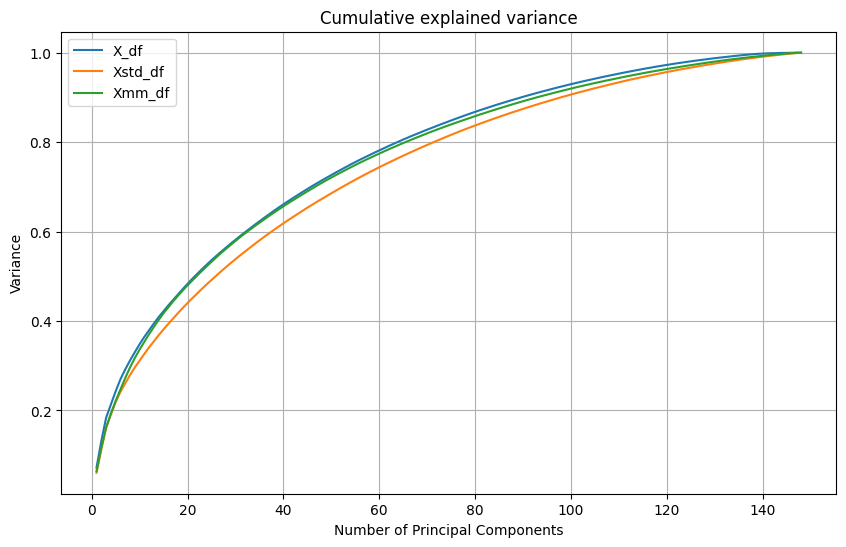

In [25]:
# Function to compute PCA and cumulative explained variance
def compute_pca_and_plot(X, label):
    pca = PCA()
    pca.fit(X)

    # Cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Plot the cumulative explained variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label=label)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance')
    plt.title('Cumulative explained variance')
    plt.grid()

    return cumulative_variance

# Plot for all three datasets
plt.figure(figsize=(10, 6))
cum_var_X = compute_pca_and_plot(X_df, label='X_df')
cum_var_Xstd = compute_pca_and_plot(Xstd_df, label='Xstd_df')
cum_var_Xmm = compute_pca_and_plot(Xmm_df, label='Xmm_df')

plt.legend()
plt.show()

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [26]:
# Function to compute m and perform dimensionality reduction
def reduce_to_m_dimensions(X, target_variance=0.33, max_components=5):
    pca = PCA()
    pca.fit(X)
    
    # Compute m'
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    m_prime = np.searchsorted(cumulative_variance, target_variance) + 1  # +1 for index
    
    # Determine m
    m = min(m_prime, max_components)
    
    # Dimensionality reduction
    pca_reduction = PCA(n_components=m)
    X_reduced = pca_reduction.fit_transform(X)
    
    return X_reduced, pca_reduction

# Dimensionality reduction for Xstd_df and Xmm_df
Xstd_reduced, pca_std = reduce_to_m_dimensions(Xstd_df)
Xmm_reduced, pca_mm = reduce_to_m_dimensions(Xmm_df)

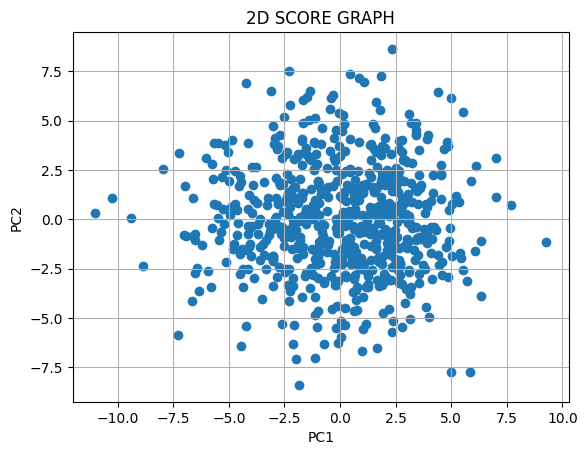

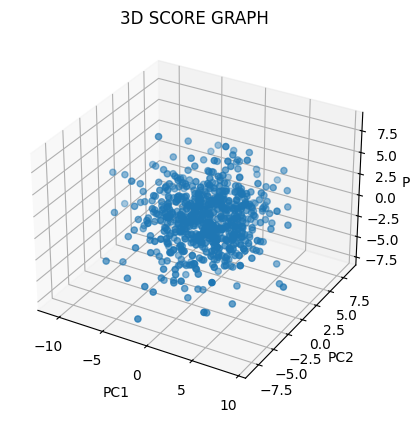

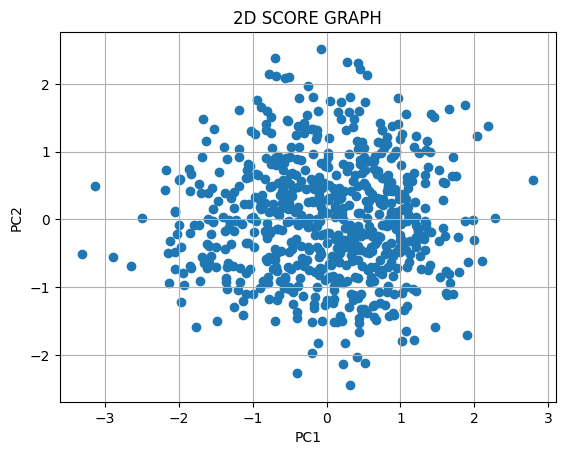

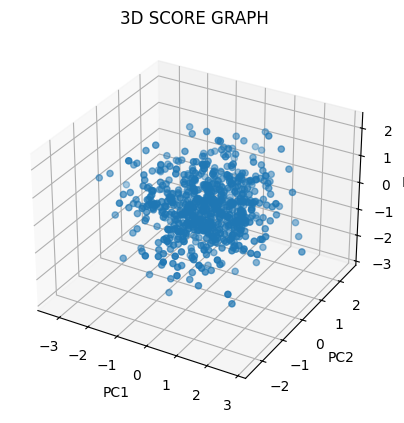

In [27]:
def plot_score_graphs(X):

    # Fit both the pca objects on the data
    pca_std.fit(X)

    # transform both the data using the pca objects
    Y_reduced = pca_std.transform(X)

    plt.figure()
    plt.scatter(Y_reduced[:, 0], Y_reduced[:, 1])
    plt.title('2D SCORE GRAPH')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y_reduced[:, 0], Y_reduced[:, 1], Y_reduced[:, 2])
    plt.title('3D SCORE GRAPH')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.grid()
    plt.show()

plot_score_graphs(Xstd_reduced)
plot_score_graphs(Xmm_reduced)

Xstd_df PCs:


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (148,) and arg 1 with shape (5,).

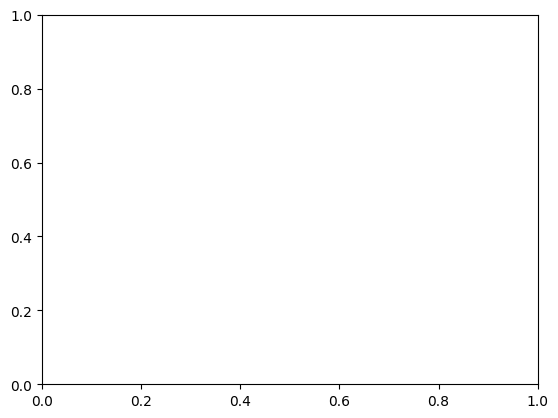

In [28]:
# Function to plot and interpret PCs
def visualize_pcs(pca, X, label):
    components = pca.components_
    features = X.columns
    num_pcs = components.shape[0]
    
    # Visualize PCs
    for i in range(num_pcs):
        plt.bar(features, components[i], label=f'PC{i + 1}')
        plt.title(f'{label} - PC{i + 1}')
        plt.ylabel('Contribution')
        plt.xticks(rotation=45)
        plt.show()
    
    return components

# Visualize and interpret PCs
print("Xstd_df PCs:")
pcs_std = visualize_pcs(pca_std, Xstd_df, label="Xstd_df")
print("\nXmm_df PCs:")
pcs_mm = visualize_pcs(pca_mm, Xmm_df, label="Xmm_df")


## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 